# Setup

In [1]:
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def get_section_results(file):
    eval_returns = {}
    for e in summary_iterator(file):
        for v in e.summary.value:
            if v.tag not in eval_returns:
                eval_returns[v.tag] = [v.simple_value]
            else:
                eval_returns[v.tag].append(v.simple_value)
    return eval_returns

In [3]:
tb_filenames = os.listdir("data/")
for i in range(len(tb_filenames)):
    tb_filenames[i] = "data/" + tb_filenames[i]
    tb_filenames[i] = tb_filenames[i] + "/" + os.listdir(tb_filenames[i])[0]

tb_filenames = np.array(tb_filenames)
pprint(tb_filenames)

array(['data/q1_sb_no_rtg_dsa_CartPole-v0_22-09-2020_15-24-20/events.out.tfevents.1600813460.Aryans-MacBook-Pro.local',
       'data/q1_lb_rtg_na_CartPole-v0_22-09-2020_16-13-29/events.out.tfevents.1600816409.Aryans-MacBook-Pro.local',
       'data/q1_xlb_rtg_na_multiTest_serial_b50000_CartPole-v0_28-09-2020_13-48-01/events.out.tfevents.1601326081.Aryans-MacBook-Pro.local',
       'data/q4_b50000_r0.02_HalfCheetah-v2_29-09-2020_18-24-07/events.out.tfevents.1601429047.Aryans-MacBook-Pro.local',
       'data/q4_search_b30000_lr0.005_rtg_nnbaseline_HalfCheetah-v2_29-09-2020_14-34-48/events.out.tfevents.1601415288.Aryans-MacBook-Pro.local',
       'data/q4_b50000_r0.02_nnbaseline_HalfCheetah-v2_29-09-2020_18-47-35/events.out.tfevents.1601430455.Aryans-MacBook-Pro.local',
       'data/q4_search_b30000_lr0.02_rtg_nnbaseline_HalfCheetah-v2_29-09-2020_14-51-10/events.out.tfevents.1601416270.Aryans-MacBook-Pro.local',
       'data/q1_xlb_rtg_na_multiTest_parrallel_b50000_CartPole-v0_28-09-2020_

In [4]:
pprint(get_section_results(tb_filenames[0]).keys())

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
dict_keys(['Eval_AverageReturn', 'Eval_StdReturn', 'Eval_MaxReturn', 'Eval_MinReturn', 'Eval_AverageEpLen', 'Train_AverageReturn', 'Train_StdReturn', 'Train_MaxReturn', 'Train_MinReturn', 'Train_AverageEpLen', 'Train_EnvstepsSoFar', 'TimeSinceStart', 'Training_Loss', 'Initial_DataCollection_AverageReturn'])


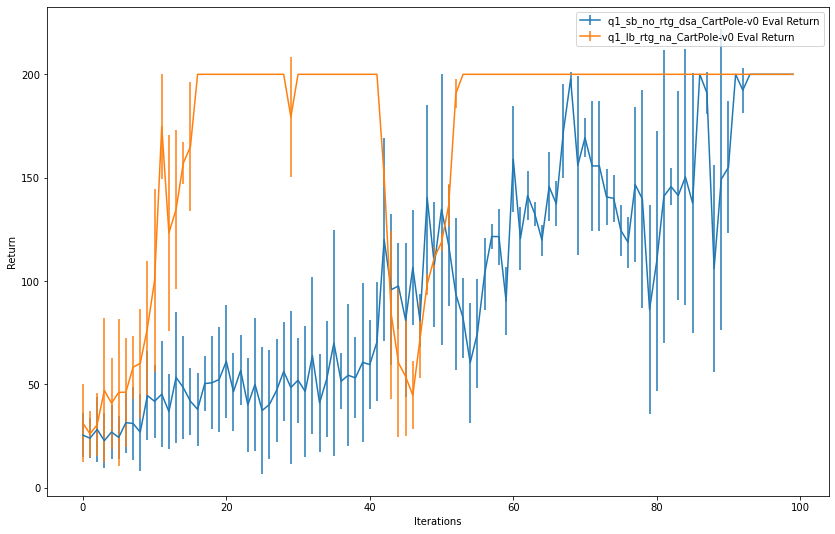

In [5]:
def plot_eval_return(filename, experiment_name = "", fmt = None):
    if experiment_name == "":
        experiment_name = filename[5:]
        experiment_name = experiment_name[:experiment_name.index("/")]
        experiment_name = experiment_name[::-1]
        experiment_name = experiment_name[experiment_name.index("_")+1:]
        experiment_name = experiment_name[experiment_name.index("_")+1:]
        experiment_name = experiment_name[::-1]
        #print(experiment_name)
    data = get_section_results(filename)
    eval_avg_return = data['Eval_AverageReturn']
    eval_std = data['Eval_StdReturn']
    iters = np.arange(len(eval_avg_return))
    
    if fmt:
        plt.errorbar(iters, eval_avg_return, eval_std, label = experiment_name + " Eval Return", fmt=fmt)
    else:
        plt.errorbar(iters, eval_avg_return, eval_std, label = experiment_name + " Eval Return")
    
    plt.xlabel("Iterations")
    plt.ylabel("Return")
    plt.legend()
    
def plot_train_return(filename, experiment_name = "", fmt = None):
    if experiment_name == "":
        experiment_name = filename[5:]
        experiment_name = experiment_name[:experiment_name.index("/")]
        experiment_name = experiment_name[::-1]
        experiment_name = experiment_name[experiment_name.index("_")+1:]
        experiment_name = experiment_name[experiment_name.index("_")+1:]
        experiment_name = experiment_name[::-1]
        #print(experiment_name)
    data = get_section_results(filename)
    eval_avg_return = data['Train_AverageReturn']
    eval_std = data['Train_StdReturn']
    iters = np.arange(len(eval_avg_return))
    
    if fmt:
        plt.errorbar(iters, eval_avg_return, eval_std, label = experiment_name + " Eval Return", fmt=fmt)
    else:
        plt.errorbar(iters, eval_avg_return, eval_std, label = experiment_name + " Eval Return")
    
    plt.xlabel("Iterations")
    plt.ylabel("Return")
    plt.legend()

plt.figure(figsize=(14, 9))
plot_eval_return(tb_filenames[0])
plot_eval_return(tb_filenames[1])

# Question 1

## Plots

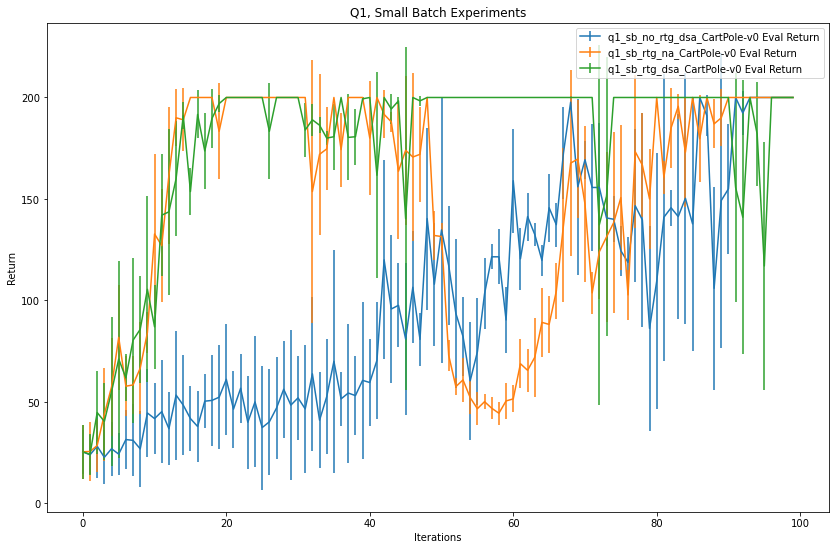

In [6]:
small_batches = [file for file in tb_filenames if file[5:11] == 'q1_sb_']

plt.figure(figsize=(14, 9))
for filename in small_batches:
    #plt.figure()
    plot_eval_return(filename)

plt.title("Q1, Small Batch Experiments")
del small_batches

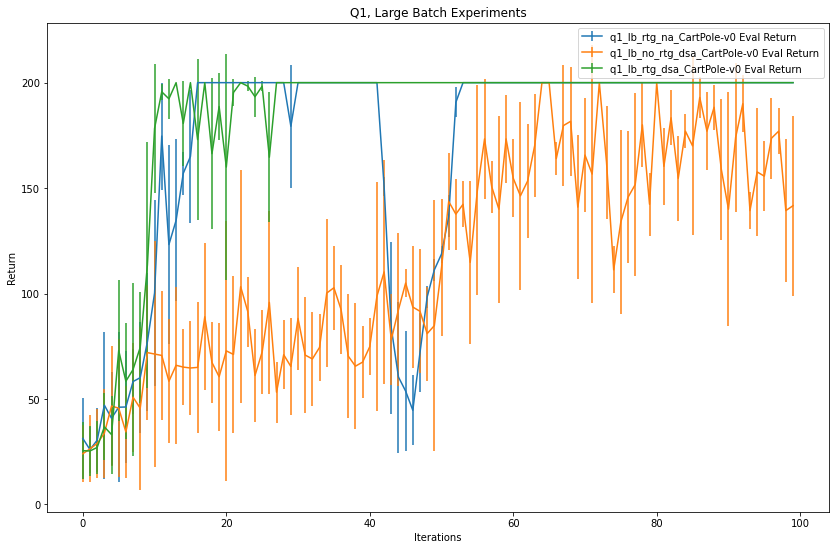

In [33]:
large_batches = [file for file in tb_filenames if file[5:11] == 'q1_lb_']

plt.figure(figsize=(14, 9))
for filename in large_batches:
    #plt.figure()
    plot_eval_return(filename)

plt.title("Q1, Large Batch Experiments")
del large_batches

## Written Response Questions

# Question 2

In [8]:
q2_file = [file for file in tb_filenames if file[5:7] == 'q2'][0]
q2_file

'data/q2_b250_r0.01_InvertedPendulum-v2_22-09-2020_19-27-21/events.out.tfevents.1600828041.Aryans-MacBook-Pro.local'

Text(0.5, 1.0, 'Q2 Average reward curve')

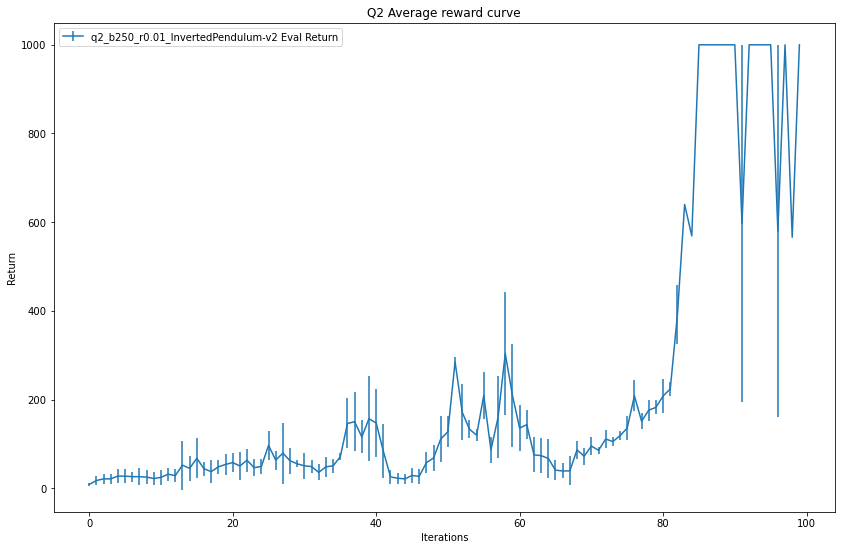

In [9]:
plt.figure(figsize=(14, 9))
plot_eval_return(q2_file)
plt.title('Q2 Average reward curve')

I used a batch size of 250 and a learning rate of 0.01. Other than this, only default params were used

# Question 3


In [10]:
q3_file = [file for file in tb_filenames if file[5:7] == 'q3'][0]
q3_file

'data/q3_b40000_r0.005_LunarLanderContinuous-v2_22-09-2020_20-13-46/events.out.tfevents.1600830826.Aryans-MacBook-Pro.local'

Text(0.5, 1.0, 'Q3 Average reward curve')

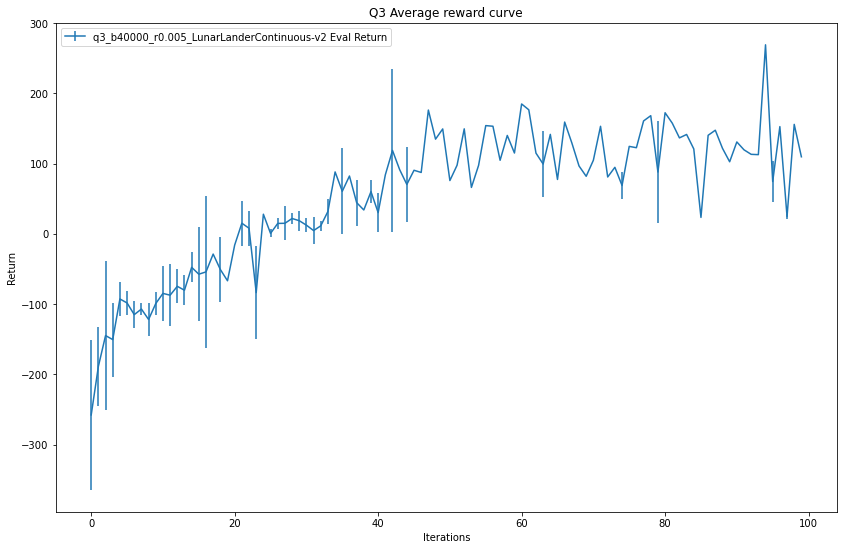

In [11]:
plt.figure(figsize=(14, 9))
plot_eval_return(q3_file)
plt.title('Q3 Average reward curve')

# Question 4

In [34]:
q4_files = sorted([file for file in tb_filenames if file[5:9] == 'q4_s'])
q4_files

['data/q4_search_b10000_lr0.005_rtg_nnbaseline_HalfCheetah-v2_29-09-2020_14-25-38/events.out.tfevents.1601414738.Aryans-MacBook-Pro.local',
 'data/q4_search_b10000_lr0.01_rtg_nnbaseline_HalfCheetah-v2_29-09-2020_14-28-43/events.out.tfevents.1601414923.Aryans-MacBook-Pro.local',
 'data/q4_search_b10000_lr0.02_rtg_nnbaseline_HalfCheetah-v2_29-09-2020_14-31-47/events.out.tfevents.1601415107.Aryans-MacBook-Pro.local',
 'data/q4_search_b30000_lr0.005_rtg_nnbaseline_HalfCheetah-v2_29-09-2020_14-34-48/events.out.tfevents.1601415288.Aryans-MacBook-Pro.local',
 'data/q4_search_b30000_lr0.01_rtg_nnbaseline_HalfCheetah-v2_29-09-2020_14-43-01/events.out.tfevents.1601415781.Aryans-MacBook-Pro.local',
 'data/q4_search_b30000_lr0.02_rtg_nnbaseline_HalfCheetah-v2_29-09-2020_14-51-10/events.out.tfevents.1601416270.Aryans-MacBook-Pro.local',
 'data/q4_search_b50000_lr0.005_rtg_nnbaseline_HalfCheetah-v2_29-09-2020_14-59-20/events.out.tfevents.1601416760.Aryans-MacBook-Pro.local',
 'data/q4_search_b50000_

In [35]:
len(q4_files)

9

<ipython-input-36-28238486c59e>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(310+(ctr%3 + 1))


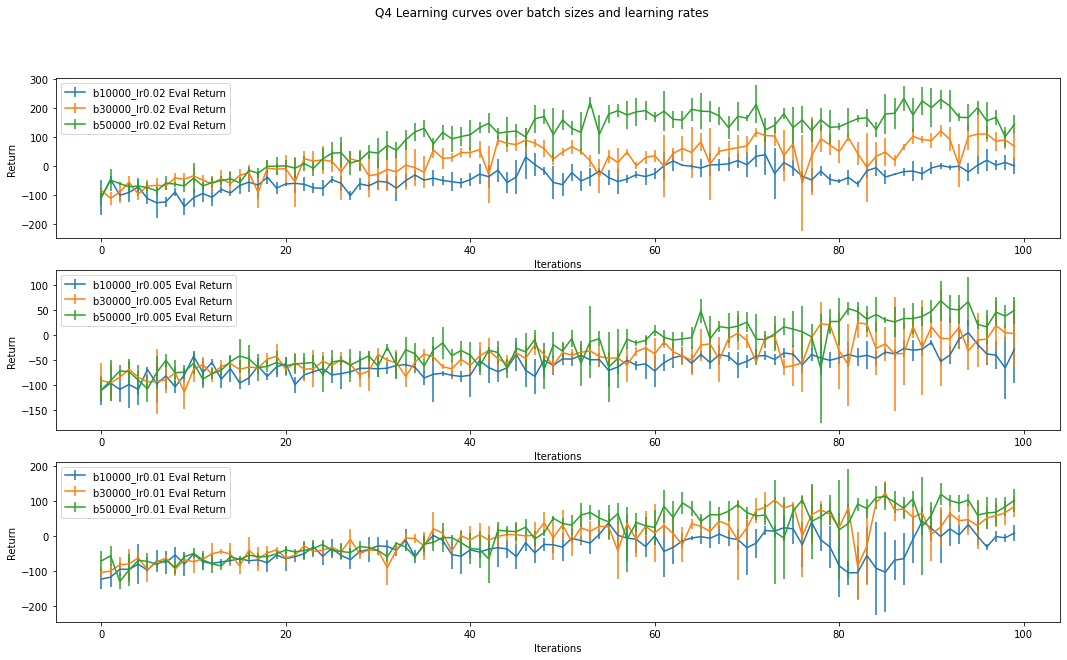

In [36]:
ctr = 1
plt.figure(figsize=(18, 10))
for filename in q4_files:
    plt.subplot(310+(ctr%3 + 1))
    plot_eval_return(filename, filename[filename.index("_b")+1: filename.index("_r")])
    ctr +=1

plt.suptitle("Q4 Learning curves over batch sizes and learning rates");

In [38]:
q4_files = [file for file in tb_filenames if file[5:9] == 'q4_b']
q4_files

['data/q4_b50000_r0.02_HalfCheetah-v2_29-09-2020_18-24-07/events.out.tfevents.1601429047.Aryans-MacBook-Pro.local',
 'data/q4_b50000_r0.02_nnbaseline_HalfCheetah-v2_29-09-2020_18-47-35/events.out.tfevents.1601430455.Aryans-MacBook-Pro.local',
 'data/q4_b50000_r0.02_rtg_nnbaseline_HalfCheetah-v2_29-09-2020_18-59-55/events.out.tfevents.1601431195.Aryans-MacBook-Pro.local',
 'data/q4_b50000_r0.02_rtg_HalfCheetah-v2_29-09-2020_18-35-56/events.out.tfevents.1601429756.Aryans-MacBook-Pro.local']

Text(0.5, 1.0, 'Q4: HalfCheetah Eval Return over different Actor-Critic methods')

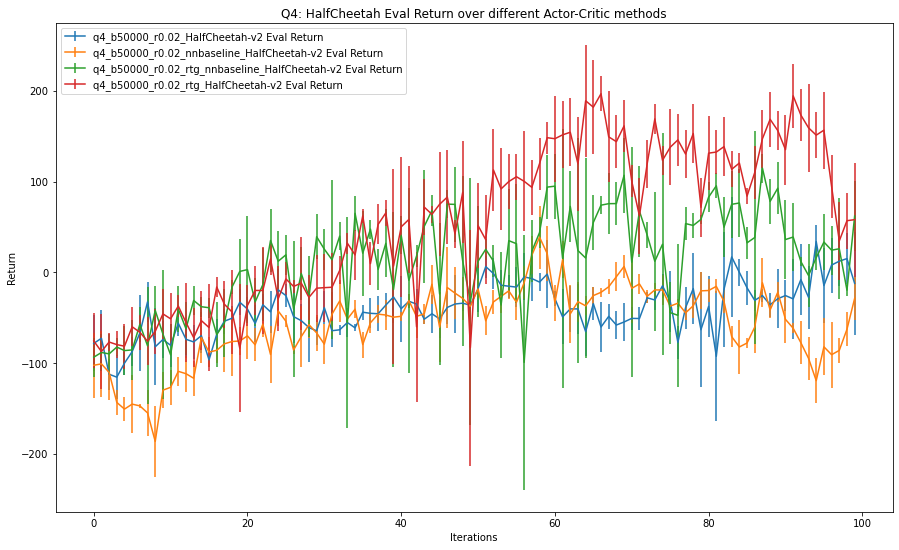

In [39]:
plt.figure(figsize=(15, 9))
for filename in q4_files:
    plot_eval_return(filename)
plt.title("Q4: HalfCheetah Eval Return over different Actor-Critic methods")

# Bonus

I parrallelized the trajectory sampling method using ray, which is a multtiprocessing library devoloped here at Berkeley which is super fast and incredibly easy to use.


To test this I ran the following command, with a massive batch size of 50,000, on both serial and parralel versions of the code.


python cs285/scripts/run_hw2.py --env_name CartPole-v0 -n 100 -b 50000 -rtg


The serial training loop took 1796.4s. After parrallelization, the training loop clocked in at 285.9s

This is a 6 times speed up, and my ray setup was only permitted to use 7 cores